In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam


In [2]:

def load_az_dataset():
	data = []
	labels = []

	data = pd.read_csv('datasets/A_Z Handwritten Data.csv').astype('float32')
        
	labels = data['0'].astype('int')
	data = data.drop('0',axis=1)
	data = np.reshape(data.values, (data.shape[0], 28,28))
	
	return (data, labels)


def load_mnist_dataset():
	((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()
	data = np.vstack([trainData, testData])
	labels = np.hstack([trainLabels, testLabels])
	return (data, labels)

In [3]:

(azData, azLabels) = load_az_dataset()
(digitsData, digitsLabels) = load_mnist_dataset()

azLabels += 10
data = np.vstack([azData, digitsData])
labels = np.hstack([azLabels, digitsLabels])

X = data
y = labels


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


Shape of Training data:  (353960, 28, 28)
Shape of Testing data:  (88490, 28, 28)


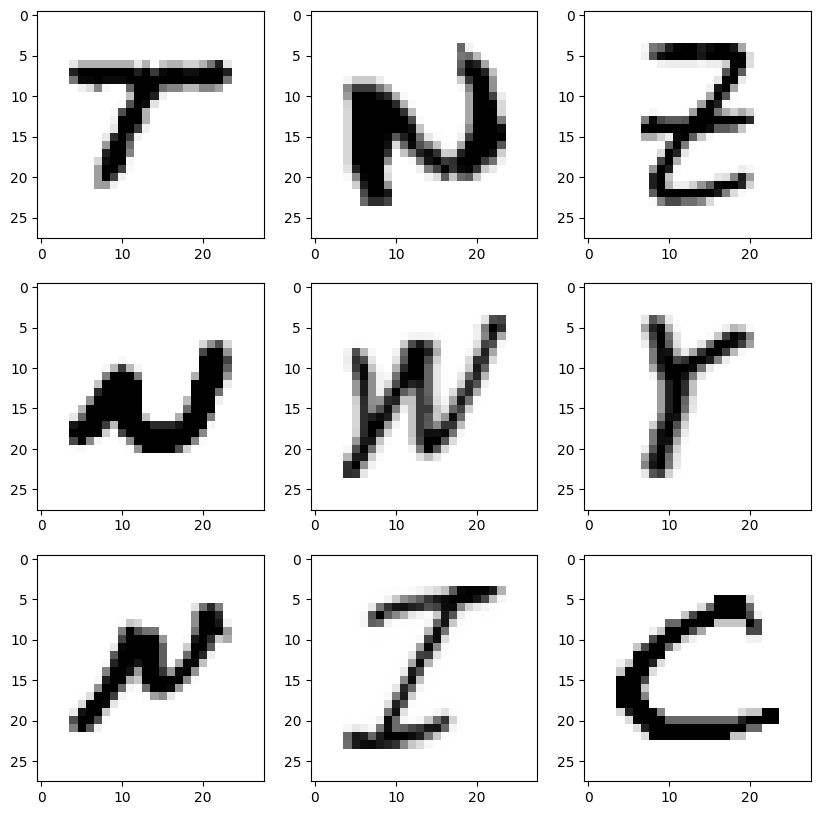

In [4]:

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

shuffle_data = shuffle(x_train)

fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

In [5]:

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)


y_training = to_categorical(y_train, num_classes = 36, dtype='int')
y_testing = to_categorical(y_test, num_classes = 36, dtype='int')

print("New shape of training labels: ", y_training.shape)
print("New shape of testing labels: ", y_testing.shape)


New shape of training data:  (353960, 28, 28, 1)
New shape of testing data:  (88490, 28, 28, 1)
New shape of training labels:  (353960, 36)
New shape of testing labels:  (88490, 36)


In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))

model.add(Dense(128,activation ="relu"))

model.add(Dense(36,activation ="softmax"))

In [7]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_training, epochs=10,  validation_data = (x_test,y_testing))

Epoch 1/10
11062/11062 [==============================] - 332s 30ms/step - loss: 0.2231 - accuracy: 0.9367 - val_loss: 0.1230 - val_accuracy: 0.9640
Epoch 2/10
11062/11062 [==============================] - 264s 24ms/step - loss: 0.1131 - accuracy: 0.9674 - val_loss: 0.1086 - val_accuracy: 0.9700
Epoch 3/10
11062/11062 [==============================] - 207s 19ms/step - loss: 0.0981 - accuracy: 0.9722 - val_loss: 0.1160 - val_accuracy: 0.9660
Epoch 4/10
11062/11062 [==============================] - 196s 18ms/step - loss: 0.0917 - accuracy: 0.9744 - val_loss: 0.0965 - val_accuracy: 0.9735
Epoch 5/10
11062/11062 [==============================] - 209s 19ms/step - loss: 0.0882 - accuracy: 0.9758 - val_loss: 0.1709 - val_accuracy: 0.9525
Epoch 6/10
11062/11062 [==============================] - 183s 17ms/step - loss: 0.0853 - accuracy: 0.9767 - val_loss: 0.0966 - val_accuracy: 0.9762
Epoch 7/10
11062/11062 [==============================] - 161s 15ms/step - loss: 0.0832 - accuracy: 0.9778

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [10]:
model.save(r'models/handwritten_character_recog_model.h5')

1/1 [==============================] - 0s 22ms/step


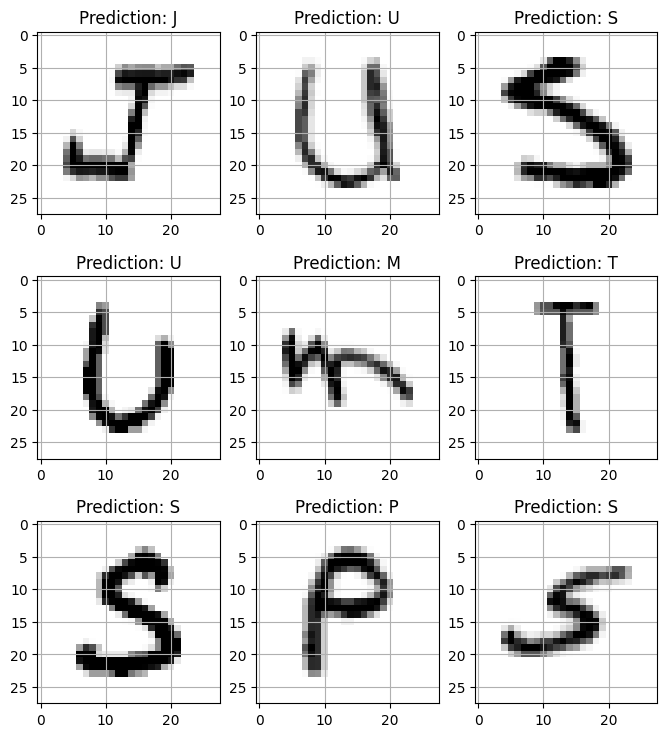

In [11]:

words = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N', 24:'O',25:'P'
	 ,26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35:'Z'}

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
	image = np.reshape(x_test[i], (28,28))
	ax.imshow(image, cmap="Greys")
	image = np.reshape(image, (1,28,28,1))
	idx = np.argmax(model.predict(image))
	pred = words[idx]
	ax.set_title("Prediction: "+pred)
	ax.grid()

